DZNE course for Panda and Matplotlib

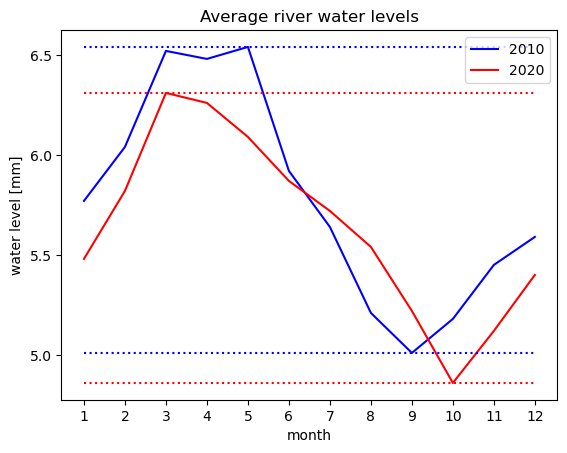

In [155]:
from matplotlib import pyplot as plt     # pyplot provides shortcuts and makes things quicker
import pandas as pd
import numpy as np
from math import nan

months = np.linspace(1, 12, 12)
water_levels_2010 = [5.77, 6.04, 6.52, 6.48, 6.54, 5.92, 5.64, 5.21, 5.01, 5.18, 5.45, 5.59]
water_levels_2020 = [5.48, 5.82, 6.31, 6.26, 6.09, 5.87, 5.72, 5.54, 5.22, 4.86, 5.12, 5.40]


plt.plot(months, water_levels_2010, color='b', linestyle='-', label='2010')
plt.plot(months, water_levels_2020, color='r', linestyle='-', label='2020')

plt.xlabel('month')
plt.ylabel('water level [mm]')
plt.title('Average river water levels')

plt.yticks(np.linspace(0, 10, 21))
plt.xticks(months)

marker_lines_2010 = [min(water_levels_2010), max(water_levels_2010)]
marker_lines_2020 = [min(water_levels_2020), max(water_levels_2020)]
plt.hlines(y=marker_lines_2010, xmin=months[0], xmax=months[-1], colors='b', linestyles=':')
plt.hlines(y=marker_lines_2020, xmin=months[0], xmax=months[-1], colors='r', linestyles=':')

plt.legend()
plt.show()

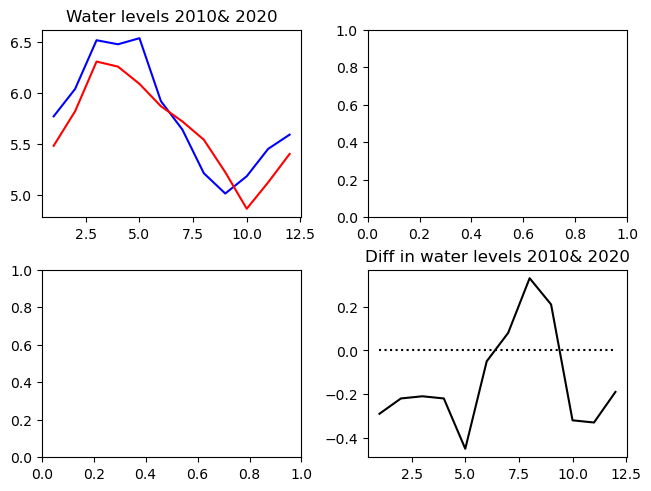

In [156]:
water_level_diff = [round(water_levels_2020[i] - water_levels_2010[i], 2) for i in range(len(water_levels_2010))] 

fig, axes = plt.subplots(nrows=2, ncols=2, layout='constrained')


plt.sca(axes[0,0])        # sca = set current axes
plt.title('Water levels 2010& 2020')
plt.plot(months, water_levels_2010, color='b', linestyle='-', label='2010')
plt.plot(months, water_levels_2020, color='r', linestyle='-', label='2020')

plt.sca(axes[1,1])
plt.title('Diff in water levels 2010& 2020')
plt.plot(months, water_level_diff, color='black', linestyle='-', label='2010')
plt.hlines(y=0, xmin=months[0], xmax=months[-1], colors="black", linestyles=':')


plt.show()

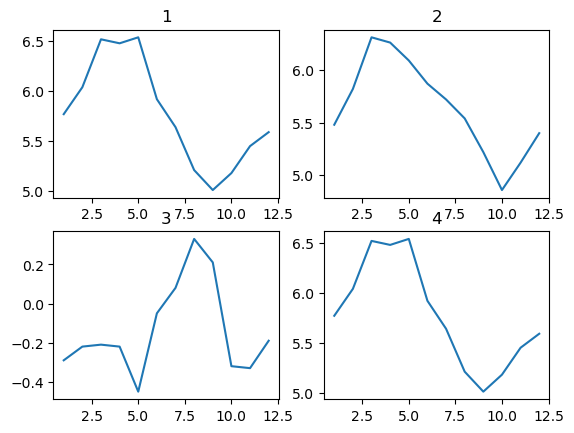

In [157]:
figure = plt.figure()
((axes1, axes2), (axes3, axes4)) = figure.subplots(nrows=2, ncols=2)

axes1.set_title('1')
axes1.plot(months, water_levels_2010)

axes2.set_title('2')
axes2.plot(months, water_levels_2020)

axes3.set_title('3')
axes3.plot(months, water_level_diff)

axes4.set_title('4')
axes4.plot(months, water_levels_2010)

plt.show()

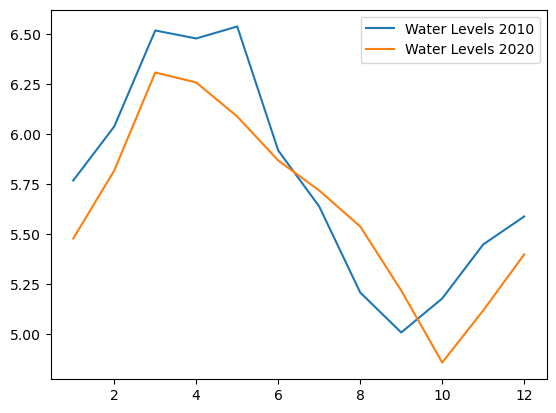

In [158]:
# measurements = pd.Series(data=water_levels_2010, index=months, name='Water 2010')

measurements = pd.DataFrame(data={'Water Levels 2010': water_levels_2010,
                                  'Water Levels 2020': water_levels_2020}, 
                            index=months)

plt.plot(measurements)
plt.legend(measurements.columns)
plt.show()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


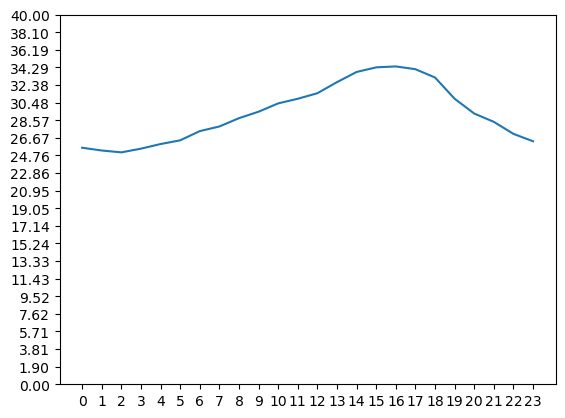

In [159]:
# These are the hours of the day, nicely formatted as hh:00 in a 24h-format
hours = np.linspace(0, 23, 24)
print(hours)

temperature = [25.6, 25.3, 25.1, 25.5, 26.0, 26.4, 
               27.4, 27.9,  28.8, 29.5, 30.4, 30.9,  
               31.5, 32.7, 33.8, 34.3,  34.4, 34.1, 
               33.2, 30.9,  29.3, 28.4, 27.1, 26.3]


plt.yticks(np.linspace(0, 40, 22))
plt.ylim(0, 40)
plt.xticks(hours)

plt.plot(hours, temperature)
plt.show()

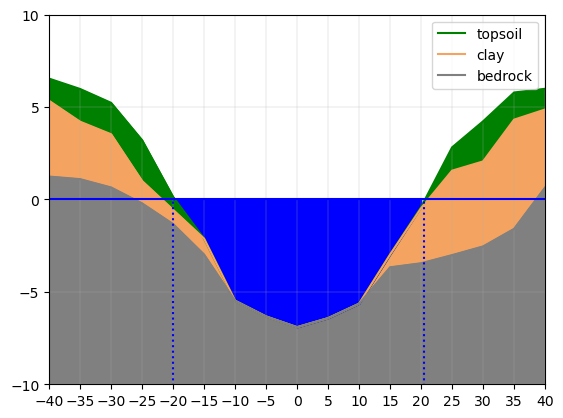

In [160]:
# The data frame gives the elevation above/below the water level for the top of each ground type.
# The index is the position along the measured cross-cut


layers = pd.DataFrame({"topsoil": [6.54, 5.98, 5.23, 3.21, 0.14, -2.12, -5.48, -6.33, -6.91, -6.42, -5.64, -2.98, -0.41, 2.82, 4.23, 5.79, 5.99],
                       "clay": [5.34, 4.21, 3.53, 1.00, -0.56, -2.12, -5.48, -6.33, -6.91, -6.42,-5.64, -2.98, -0.47, 1.56, 2.06, 4.32, 4.87],
                       "bedrock": [1.24, 1.10, 0.65, -0.21, -1.33, -2.98, -5.48, -6.33, -6.91, -6.42,-5.64, -3.67, -3.45, -3.01, -2.54, -1.59, 0.65]}, 
                       index = range(-40, 41, 5))
idx = layers.index.values


plt.plot(layers['topsoil'], color='green', label='topsoil')
plt.fill_between(x=idx, y1=layers['topsoil'], y2=layers['clay'], color='green', alpha=1)

plt.plot(layers['clay'], color='sandybrown', label='clay')
plt.fill_between(x=idx, y1=layers['clay'], y2=layers['bedrock'], color='sandybrown', alpha=1)

plt.plot(layers['bedrock'], color='gray', label='bedrock')
plt.fill_between(x=idx, y1=layers['bedrock'], y2=-100, color='gray', alpha=1)

plt.hlines(y=0, xmin=-40, xmax=40, colors="blue", linestyles='-')
plt.vlines(x=-20, ymin=-100, ymax=0, colors="blue", linestyles=':')
plt.vlines(x=20.5, ymin=-100, ymax=0, colors="blue", linestyles=':')

water_range = layers.filter(items=[i for i in range(-20, 21)], axis='rows')
plt.fill_between(water_range.index.values, water_range['topsoil'], color='blue', alpha=1)

plt.xticks(np.arange(-100, 100, 5))
plt.yticks(np.arange(-100, 100, 5))

plt.xlim(-40, 40)
plt.ylim(-10, 10)

plt.legend()
plt.grid(which='both', linewidth=0.2)
plt.show()